In [1]:
import pandas as pd
import random as rnd
import numpy as np
import math
import seaborn as sns 
import matplotlib.pyplot as plt

fortune_list = pd.read_csv("fortune.csv")#read csv file
fortune_list.head(7)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
5,Exxon Mobil,6,4.0,285640.0,23040.0,63000.0,Energy,Irving,TX,no,no,no,yes,10.0,Darren W. Woods,www.exxonmobil.com,XOM,371841
6,Berkshire Hathaway,7,-1.0,276094.0,89795.0,372000.0,Financials,Omaha,NE,no,no,no,yes,6.0,Warren E. Buffett,www.berkshirehathaway.com,BRKA,625468


In [3]:
fortune_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

# General info about dataset

In [4]:
fortune_list.describe() 

,rank,rank_change,revenue,profit,num. of employees
count,1000.000000,1000.000000,1000.000000,997.000000,9.990000e+02
mean,500.497000,-0.701000,17986.801400,2026.476329,3.578867e+04
std,288.818067,31.818674,40813.281554,6421.578081,1.046546e+05
min,1.000000,-178.000000,2107.200000,-6520.000000,1.600000e+02
25%,250.750000,-3.000000,3500.750000,195.400000,6.500000e+03
50%,500.500000,0.000000,6375.500000,572.000000,1.353000e+04
75%,750.250000,0.000000,14615.475000,1498.300000,2.890000e+04
max,1000.000000,295.000000,572754.000000,94680.000000,2.300000e+06


In [31]:
fortune_list_copy = fortune_list.copy()

# Data preprocessing(handle missing values)

<AxesSubplot:>

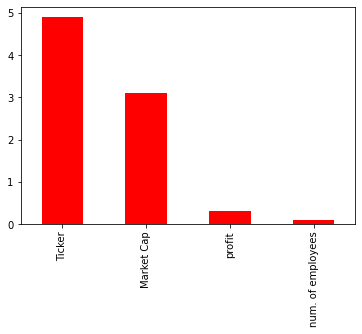

In [32]:
null =fortune_list.isna().sum().sort_values(ascending = False)/len(fortune_list)*100
null[null != 0].plot(kind='bar', color='red') 

In [63]:
missingPercentages = fortune_list.isna().sum().sort_values(ascending = False)/len(fortune_list)*100
print(missingPercentages) #it shows percentages of missing values

Ticker               4.9
Market Cap           3.1
profit               0.3
num. of employees    0.1
ceo_founder          0.0
Website              0.0
CEO                  0.0
prev_rank            0.0
profitable           0.0
ceo_woman            0.0
company              0.0
rank                 0.0
state                0.0
city                 0.0
sector               0.0
revenue              0.0
rank_change          0.0
newcomer             0.0
dtype: float64


In [34]:
temp = pd.DataFrame()
#dataları 
temp['profit'] = fortune_list['profit'].copy()
temp['revenue'] = fortune_list['revenue'].copy()
temp['profit'] = temp.groupby("revenue").transform(lambda x: x.fillna(x.mean()))
fortune_list['profit'] = temp['profit'].copy()  #degerleri  gruplayp  ortalamaasını alıp eksik degerlere ekliyoruz
ifit = fortune_list['profit'] == fortune_list.loc[40, 'profit']
ortalama = fortune_list[ifit]['profit'].mean()
print(" örneğin alması gereken profit değeri:", ortalama)
print('örneğin kayıp değeri doldurulduktan sonra aldığı değer:', fortune_list.loc[40]['profit'])

 örneğin alması gereken profit değeri: 21548.0
örneğin kayıp değeri doldurulduktan sonra aldığı değer: 21548.0


In [28]:

fortune_list_copy['Market Cap'] = pd.to_numeric(fortune_list_copy['Market Cap'], errors='coerce')
print(fortune_list_copy['Market Cap'].dtype)

float64


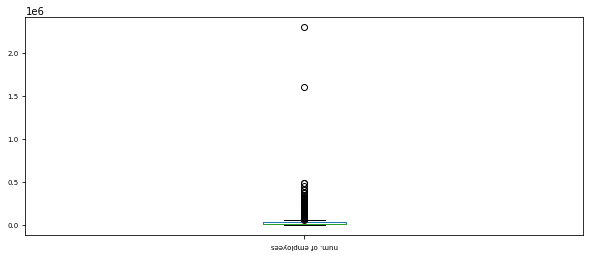

In [36]:
boxplot = fortune_list.boxplot(column=['num. of employees'],figsize = (10,4), rot = 180, fontsize= '7', grid = False)


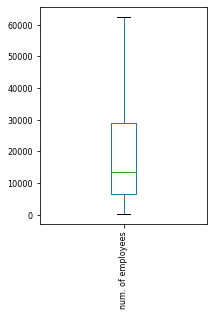

In [37]:
market_cap= fortune_list['num. of employees'].quantile([0.25, 0.5, 0.75])
a=market_cap[0.75]+(1.5*(market_cap[0.75] - market_cap[0.25]))
fortune_list_copy= fortune_list.copy()

fortune_list_copy['num. of employees'] = np.where(
    fortune_list_copy['num. of employees'] > a,
    a,
       fortune_list_copy['num. of employees']
    )
boxplot = fortune_list_copy.boxplot(column=['num. of employees'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)

In [39]:
emptyticker = fortune_list_copy[fortune_list_copy['Ticker'].isnull()] #ticker da boş olanları göstercek 
emptyticker 

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
41,State Farm Insurance,42,-3.0,82224.7,1280.9,53586.0,Financials,Bloomington,IL,no,no,no,yes,39.0,Michael L. Tipsord,www.statefarm.com,NaN,NaN
71,New York Life Insurance,72,-5.0,51198.5,277.1,14344.0,Financials,New York,NY,no,no,no,yes,67.0,Craig DeSanto,www.newyorklife.com,NaN,-
75,Publix Super Markets,76,-7.0,48393.9,4412.2,62500.0,Food & Drug Stores,Lakeland,FL,no,no,no,yes,69.0,Randall T. Jones Sr.,www.publix.com,NaN,-
77,Liberty Mutual Insurance Group,78,-7.0,48200.0,3068.0,45000.0,Financials,Boston,MA,no,no,no,yes,71.0,David H. Long,www.libertymutual.com,NaN,NaN
79,Nationwide,80,-4.0,47376.0,1617.2,24134.0,Financials,Columbus,OH,no,no,no,yes,76.0,Kirt A. Walker,www.nationwide.com,NaN,NaN
89,TIAA,90,-11.0,40526.4,4060.7,15065.0,Financials,New York,NY,no,no,yes,yes,79.0,Thasunda Brown Duckett,www.tiaa.org,NaN,-
94,CHS,95,8.0,38448.0,554.0,9941.0,"Food, Beverages & Tobacco",Inver Grove Heights,MN,no,no,no,yes,103.0,Jay D. Debertin,www.chsinc.com,NaN,NaN
95,USAA,96,-9.0,37469.6,3300.0,37335.0,Financials,San Antonio,TX,no,no,no,yes,87.0,Wayne Peacock,www.usaa.com,NaN,-
96,Northwestern Mutual,97,-7.0,36751.2,977.8,7585.0,Financials,Milwaukee,WI,no,no,no,yes,90.0,John E. Schlifske,www.northwesternmutual.com,NaN,-
99,Massachusetts Mutual Life Insurance,100,23.0,35899.5,319.3,10052.0,Financials,Springfield,MA,no,no,no,yes,123.0,Roger W. Crandall,www.massmutual.com,NaN,-


In [38]:
fortune_list_copy.Ticker.unique()

array(['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH', 'XOM', 'BRKA', 'GOOGL', 'MCK',
       'ABC', 'COST', 'CI', 'T', 'MSFT', 'CAH', 'CVX', 'HD', 'WBA', 'MPC',
       'ELV', 'KR', 'F', 'VZ', 'JPM', 'GM', 'CNC', 'META', 'CMCSA', 'PSX',
       'VLO', 'DELL', 'TGT', 'FNMA', 'UPS', 'LOW', 'BAC', 'JNJ', 'ADM',
       'FDX', 'HUM', 'WFC', nan, 'PFE', 'C', 'PEP', 'INTC', 'PG', 'GE',
       'IBM', 'MET', 'PRU', 'ACI', 'DIS', 'ET', 'LMT', 'FMCC', 'GS',
       'RTX', 'HPQ', 'BA', 'MS', 'HCA', 'ABBV', 'DOW', 'TSLA', 'ALL',
       'AIG', 'BBY', 'CHTR', 'SYY', 'MRK', 'CAT', 'CSCO', 'TJX', 'COP',
       'PGR', 'TSN', 'BMY', 'NKE', 'DE', 'AXP', 'ABT', 'SNEX', 'PAGP',
       'EPD', 'ORCL', 'TMO', 'KO', 'GD', 'NUE', 'EXC', 'NOC', 'MMM',
       'TRV', 'ARW', 'HON', 'DG', 'QCOM', 'COF', 'SNX', 'PM', 'INT',
       'PFGC', 'DAL', 'AAL', 'NFLX', 'PARA', 'USFD', 'DHR', 'JBL', 'SBUX',
       'MDLZ', 'LLY', 'HPE', 'DHI', 'MOH', 'CBRE', 'MU', 'AVGO', 'GILD',
       'PBF', 'LEN', 'UNFI', 'NRG', 'NVDA', 'OXY', 'CRM', 'DLTR

In [40]:
fortune_list_copy.Ticker.mode() #ticker attr en cok tekrar eden isimleri gosterip bunlarla doldurdum

0         A
1        AA
2       AAL
3       AAP
4      AAPL
       ... 
946    ZEUS
947      ZG
948    ZION
949      ZM
950     ZTS
Name: Ticker, Length: 951, dtype: object

In [41]:
fortune_list_copy['Ticker']=fortune_list_copy['Ticker'].fillna('AA')

In [42]:
fortune_list_copy.loc[41]#i am checking  TICKER is AA

company              State Farm Insurance
rank                                   42
rank_change                          -3.0
revenue                           82224.7
profit                             1280.9
num. of employees                 53586.0
sector                         Financials
city                          Bloomington
state                                  IL
newcomer                               no
ceo_founder                            no
ceo_woman                              no
profitable                            yes
prev_rank                            39.0
CEO                    Michael L. Tipsord
Website                 www.statefarm.com
Ticker                                 AA
Market Cap                            NaN
Name: 41, dtype: object

In [43]:
emptyprof=fortune_list_copy[fortune_list_copy['profit'].isnull()]
emptyprof# i checked the missing values from profit

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
498,Frontier Communications,499,-97.0,6411.0,NaN,15640.0,Telecommunications,Norwalk,CT,no,no,no,no,402.0,Nick Jeffery,https://www.frontier.com,FYBR,6763.1
534,Chesapeake Energy,535,0.0,5809.0,NaN,1300.0,Energy,Oklahoma City,OK,no,no,no,no,,Domenic J. Dell&#039;Osso Jr.,https://www.chk.com,CHK,11135.9
735,Garrett Motion,736,0.0,3633.0,NaN,7600.0,Motor Vehicles & Parts,Plymouth,MI,no,no,no,no,,Olivier Rabiller,https://www.garrettmotion.com,GTX,463.9


In [44]:
fortune_list_copy['prev_rank'] = pd.to_numeric(fortune_list_copy['prev_rank'], errors='coerce')

median = fortune_list_copy['prev_rank'].median()

#i  replace NaN values with the calculated median
fortune_list_copy['prev_rank'] = fortune_list_copy['prev_rank'].fillna(median)

# Calculate the mean
mean = fortune_list_copy['prev_rank'].mean()

In [45]:
median = fortune_list_copy['profit'].median()
mean = fortune_list_copy['profit'].mean()
fortune_list_copy['profit']=fortune_list_copy['profit'].fillna(median)
mean

2026.4763289869593

In [46]:
employ = fortune_list_copy[fortune_list_copy['num. of employees'].isnull()]
employ

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
865,Univision Communciations,866,0.0,2841.0,133.7,NaN,Media,New York,NY,no,no,no,yes,237.0,Wade C. Davis,https://https://corporate.televisaunivision.com,AA,NaN


In [47]:
median = fortune_list_copy['num. of employees'].median()
fortune_list_copy['num. of employees']=fortune_list_copy['num. of employees'].fillna(median)
median

13530.0

In [51]:
import pandas as pd

print("Data Types:")
print(fortune_list_copy.dtypes)


fortune_list_copy['Market Cap'] = pd.to_numeric(fortune_list_copy['Market Cap'], errors='coerce')


nan_count_after = fortune_list_copy['Market Cap'].isnull().sum()


print("NaN Count After Transformation:", nan_count_after)


nan_count = fortune_list_copy['Market Cap'].isnull().sum()

if nan_count > 0:
  
    mean = fortune_list_copy['Market Cap'].mean()
    fortune_list_copy['Market Cap'].fillna(mean, inplace=True)

if fortune_list_copy['Market Cap'].dtype == 'object':
   
    fortune_list_copy['Market Cap'] = pd.to_numeric(fortune_list_copy['Market Cap'], errors='coerce')

nan_count_after = fortune_list_copy['Market Cap'].isnull().sum()


print("NaN Count After Transformation:", nan_count_after)
emptyticker = fortune_list_copy[fortune_list_copy['Market Cap'].isnull()]
emptyticker


Data Types:
company               object
rank                   int64
rank_change          float64
revenue              float64
profit               float64
num. of employees    float64
sector                object
city                  object
state                 object
newcomer              object
ceo_founder           object
ceo_woman             object
profitable            object
prev_rank            float64
CEO                   object
Website               object
Ticker                object
Market Cap           float64
dtype: object
NaN Count After Transformation: 0
NaN Count After Transformation: 0


,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap


In [54]:
#prev rank numeric cevirip median degeriyle bos olan alanları doldurdum
fortune_list_copy['prev_rank'] = pd.to_numeric(fortune_list_copy['prev_rank'], errors='coerce')
median = fortune_list_copy['prev_rank'].median()
fortune_list_copy['prev_rank'] = fortune_list_copy['prev_rank'].fillna(median)

median = fortune_list_copy['profit'].median()
mean = fortune_list_copy['profit'].mean()
fortune_list_copy['profit']=fortune_list_copy['profit'].fillna(median)
mean
fortune_list_copy.loc[498] 

company               Frontier Communications
rank                                      499
rank_change                             -97.0
revenue                                6411.0
profit                                  572.0
num. of employees                     15640.0
sector                     Telecommunications
city                                  Norwalk
state                                      CT
newcomer                                   no
ceo_founder                                no
ceo_woman                                  no
profitable                                 no
prev_rank                               402.0
CEO                              Nick Jeffery
Website              https://www.frontier.com
Ticker                                   FYBR
Market Cap                             6763.1
Name: 498, dtype: object

In [64]:
beklenmedik_durum = pd.crosstab(fortune_list_copy['profit'], fortune_list_copy['company'], margins=True)
beklenmedik_durum

company,1-800-Flowers.com,3M,A-Mark Precious Metals,A.O. Smith,ABM Industries,ADT,AECOM,AES,AGCO,AMC Entertainment Holdings,...,Zimmer Biomet Holdings,Zions Bancorp.,Zoetis,Zoom Video Communications,Zynga,eBay,eXp World Holdings,iHeartMedia,loanDepot,All
profit,,,,,,,,,,,,,,,,,,,,,
-6520.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4539.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4439.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4202.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-2343.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61271.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76033.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89795.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
print("Count of missing values:")
fortune_list_copy.isna().sum().sort_values(ascending=False)

Count of missing values:


company              0
rank                 0
Ticker               0
Website              0
CEO                  0
prev_rank            0
profitable           0
ceo_woman            0
ceo_founder          0
newcomer             0
state                0
city                 0
sector               0
num. of employees    0
profit               0
revenue              0
rank_change          0
Market Cap           0
dtype: int64


# Data visualization

<AxesSubplot:ylabel='Frequency'>

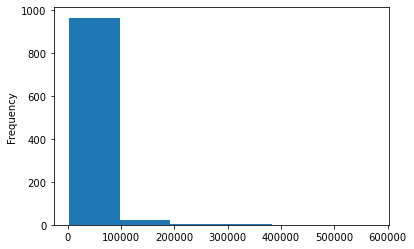

In [66]:

fortune_list['revenue'].plot(kind='hist',bins=6) #shows frequency of data points  within a specific range of revenue values.


<AxesSubplot:ylabel='ceo_woman'>

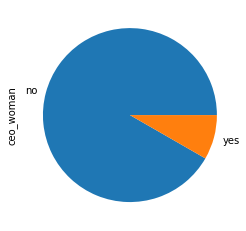

In [67]:
fortune_list['ceo_woman'].value_counts().plot.pie()

<AxesSubplot:xlabel='revenue', ylabel='Count'>

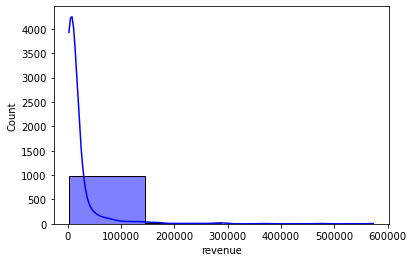

In [68]:
sns.histplot(fortune_list, x='revenue', kde=True,bins=4, color="b")

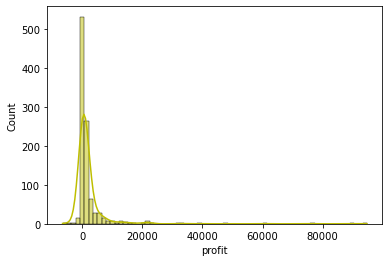

In [69]:
sns.histplot(fortune_list, x='profit',bins=70, kde=True, color="y") 
mean=fortune_list['profit'].mean()
median=fortune_list['profit'].median()

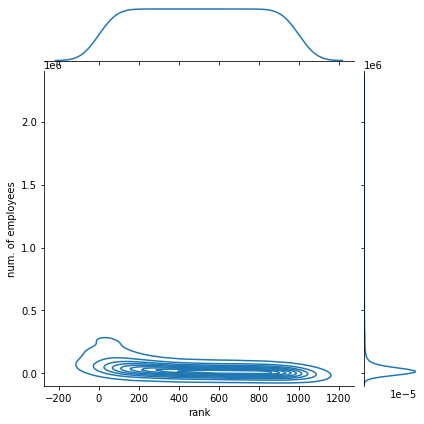

In [70]:
sns.jointplot(x ='rank', y ='num. of employees', data = fortune_list, kind ='kde') 
#grafiğin farklı bölgelerinde veri noktalarının yoğunluğu hakkında bilgi vrmesi icin grafik egilimlerini kullandım.

Toplam 1 farklı 'revenue' değeri:
[257637.]


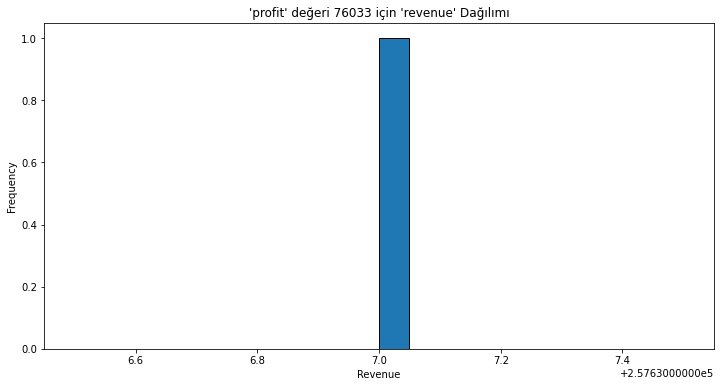

In [71]:
import matplotlib.pyplot as plt
#  Profit column sıfırdan buyukse karlı 
fortune_list_copy['profitable'] = (fortune_list_copy['profit'] > 0).astype(int)
filtered_data = fortune_list_copy[fortune_list_copy['profit'] ==76033.0] 
unique_revenues = filtered_data['revenue'].unique()
num_unique_revenues = len(unique_revenues)

print(f"Toplam {num_unique_revenues} farklı 'revenue' değeri:")
print(unique_revenues)

#crosstable da bu degerde birden fazla değer var
#bunun nedeni analiz etmeye calısacagım


plt.figure(figsize=(12, 6))
plt.hist(filtered_data['revenue'], bins=20, edgecolor='black')
plt.title("'profit' değeri 76033 için 'revenue' Dağılımı")
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()
#profit 3452 (bu değer için olan ilk basta calısıp sonra calısmadı o yuzden değiştirdim)olanlarda revenue düşük olanlar frekansi yuksek genel olarak düşük performansa veya sorunlu bir finansal duruma sahip olabileceğini düşündürdü.
#Bu durum  gelir düzeyinin beklentilerin altında olduğunu ve şirketin karlılığının düşük olduğunu işaret edebilir.Sektörel ekonomik koşullar veya sektöre özgü zorluklar da
#olabilir hedeflere ulaşmak için bilinçli olarak düşük revenue seviyelerini tercih edebilirler. Örneğin, düşük fiyatlı ürünlerle pazar payını artırmayı hedefleyebilirler

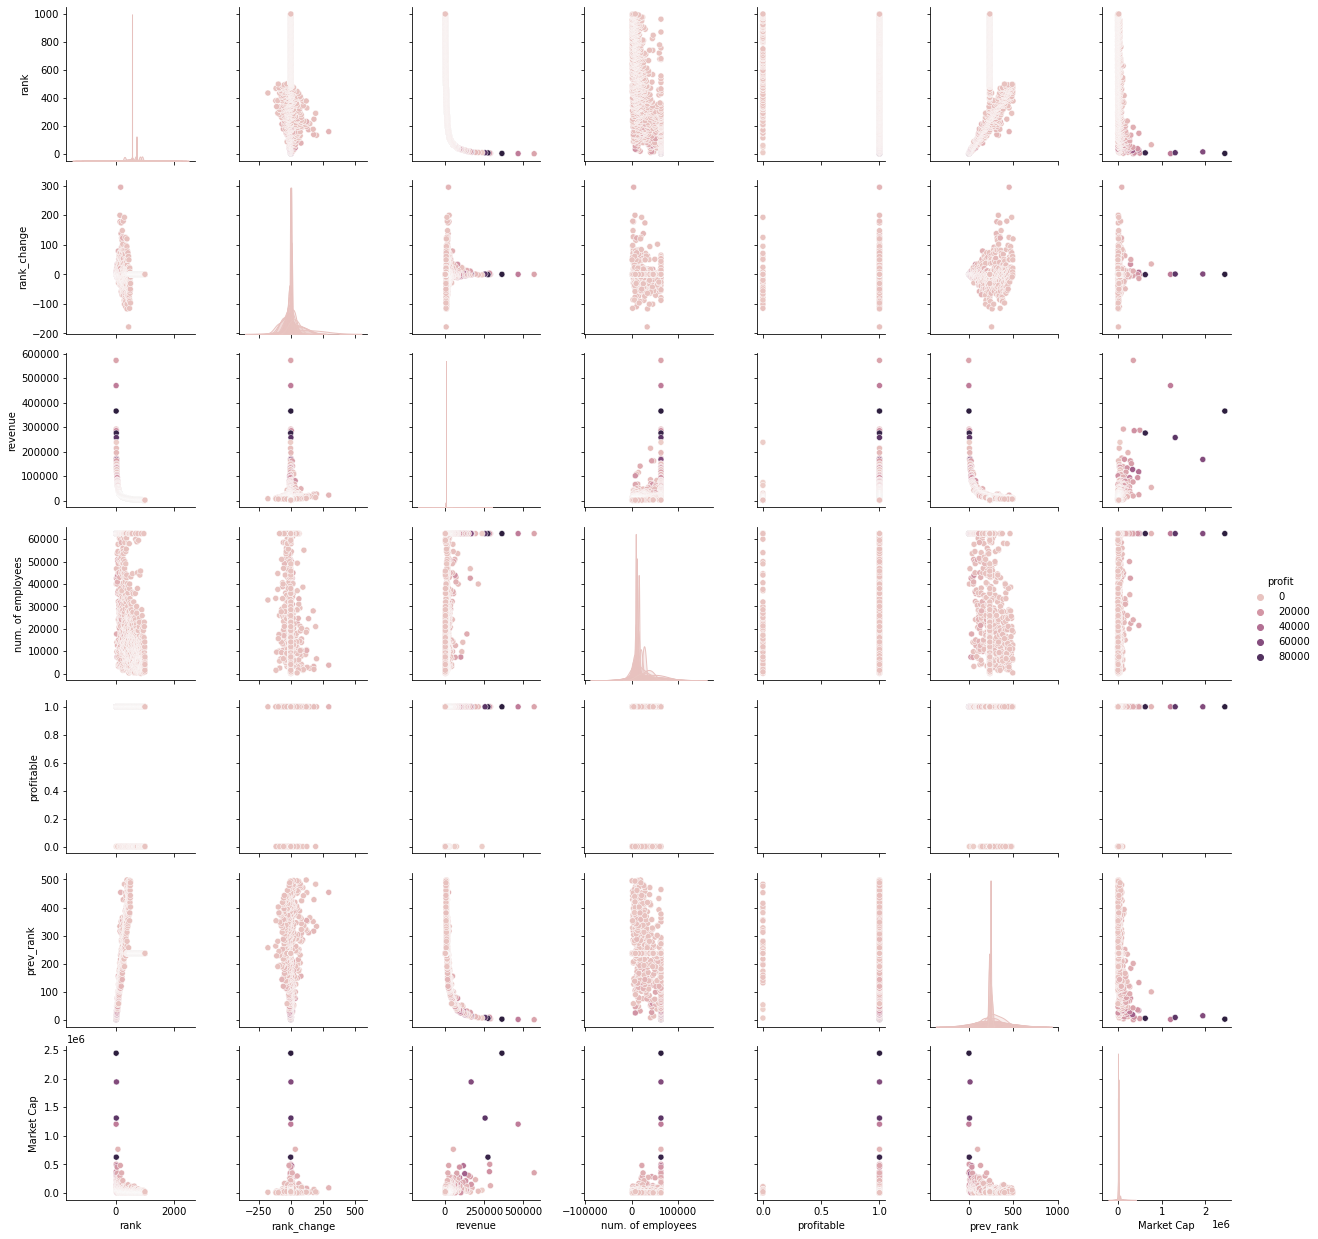

In [72]:
sns.pairplot(data=fortune_list_copy, hue='profit')

<AxesSubplot:xlabel='revenue', ylabel='rank_change'>

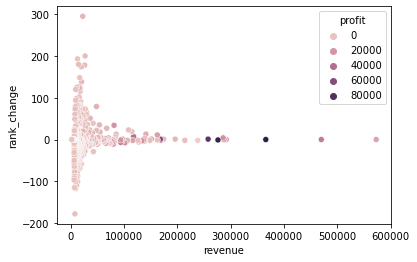

In [73]:
species = list(fortune_list_copy.groupby('profit'))
sns.scatterplot(data = fortune_list_copy, x = 'revenue', y = 'rank_change', hue='profit')

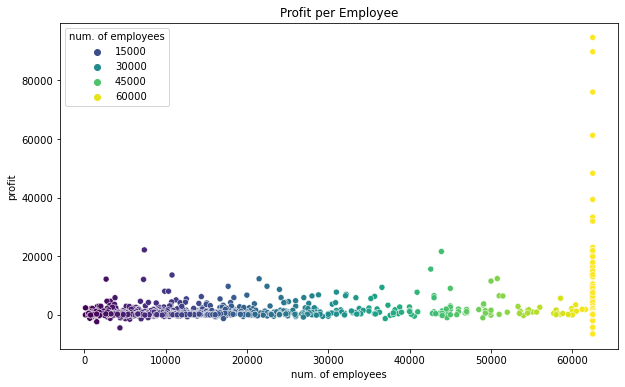

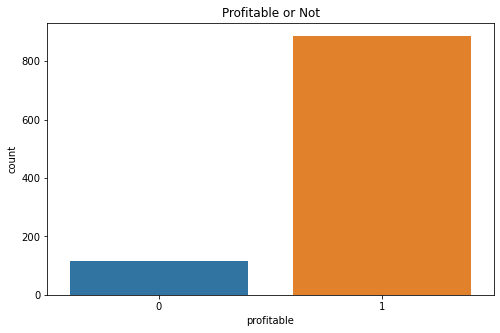

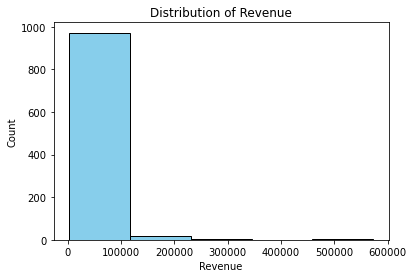

In [74]:
#  Profit column sıfırdan buyukse karlı 
# calısana dusen profite hesaplayarak yeni attribute ekledim
fortune_list_copy['Profit_Per_Employee'] = fortune_list_copy['profit'] / fortune_list_copy['num. of employees']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num. of employees', y='profit', data=fortune_list_copy, hue='num. of employees', palette='viridis')
plt.title('Profit per Employee')
plt.show()

plt.figure(figsize=(8, 5))
fortune_list_copy['profitable'] = (fortune_list_copy['profit'] > 0).astype(int)
sns.countplot(x='profitable', data=fortune_list_copy)
plt.title('Profitable or Not')
plt.show()

plt.hist(fortune_list_copy['revenue'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

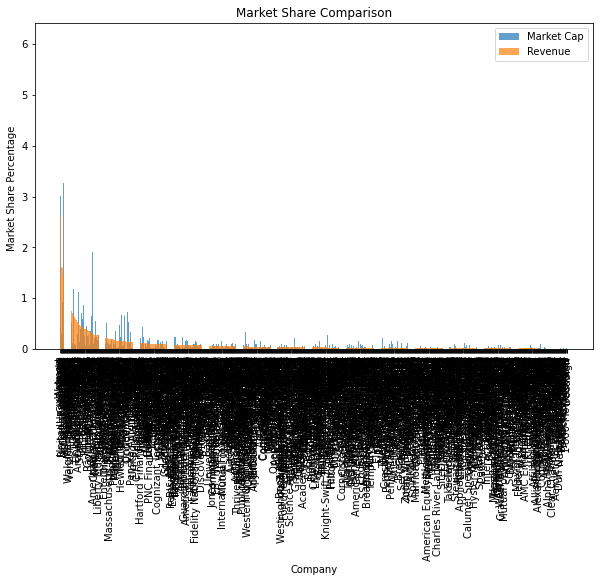

In [83]:

df = pd.DataFrame(fortune_list_copy)

#  Total Market Cap and Total Revenue
total_market_cap = df['Market Cap'].sum()
total_revenue = df['revenue'].sum()

#  Market Share based on Market Cap
df['Marketshare_marketcap'] = (df['Market Cap'] / total_market_cap) * 100

# Calculate Market Share based on Revenue
df['Marketshare_revenue'] = (df['revenue'] / total_revenue) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))

# Bar chart for Market Share based on Market Cap
plt.bar(df['company'], df['Marketshare_marketcap'], label='Market Cap', alpha=0.7)

# Bar chart for Market Share based on Revenue
plt.bar(df['company'], df['Marketshare_revenue'], label='Revenue', alpha=0.7)

plt.xlabel('Company')
plt.xticks(rotation=90)
plt.ylabel('Market Share Percentage ')
plt.title('Market Share Comparison')
plt.legend()
plt.show()

In [75]:
categoric=[a for a in fortune_list_copy.columns if fortune_list_copy[a].dtypes=='object'] 
categoric # i cannot transform all of this to numeric.

['company',
 'sector',
 'city',
 'state',
 'newcomer',
 'ceo_founder',
 'ceo_woman',
 'CEO',
 'Website',
 'Ticker']

In [76]:
fortune_list_copy['ceo_woman'] = np.where(fortune_list_copy['ceo_woman'] == 'yes', 1, 0) 
numeric=[a for a in fortune_list_copy.columns if fortune_list_copy[a].dtypes!='object']
numeric

['rank',
 'rank_change',
 'revenue',
 'profit',
 'num. of employees',
 'ceo_woman',
 'profitable',
 'prev_rank',
 'Market Cap',
 'Profit_Per_Employee']

In [77]:
corelation = fortune_list_copy.corr() #it iss the corralation matrix to see corelation with features between each other.
corelation

,rank,rank_change,revenue,profit,num. of employees,ceo_woman,profitable,prev_rank,Market Cap,Profit_Per_Employee
rank,1.000000,-0.048507,-0.502607,-0.368595,-0.621448,-0.011379,-0.143109,0.311143,-0.310866,-0.061952
rank_change,-0.048507,1.000000,0.031845,0.019665,-0.115583,-0.015822,0.020983,0.128979,0.022338,0.078249
revenue,-0.502607,0.031845,1.000000,0.651453,0.464253,0.029775,0.073526,-0.539004,0.620152,0.105375
profit,-0.368595,0.019665,0.651453,1.000000,0.344699,-0.010053,0.143187,-0.389507,0.831403,0.241711
num. of employees,-0.621448,-0.115583,0.464253,0.344699,1.000000,0.043662,0.087429,-0.429761,0.309286,-0.079831
ceo_woman,-0.011379,-0.015822,0.029775,-0.010053,0.043662,1.000000,0.016675,-0.004992,-0.028793,-0.019058
profitable,-0.143109,0.020983,0.073526,0.143187,0.087429,0.016675,1.000000,-0.030739,0.072501,0.151017
prev_rank,0.311143,0.128979,-0.539004,-0.389507,-0.429761,-0.004992,-0.030739,1.000000,-0.322732,-0.053156
Market Cap,-0.310866,0.022338,0.620152,0.831403,0.309286,-0.028793,0.072501,-0.322732,1.000000,0.151798
Profit_Per_Employee,-0.061952,0.078249,0.105375,0.241711,-0.079831,-0.019058,0.151017,-0.053156,0.151798,1.000000


In [78]:
covariance=fortune_list_copy.cov()
covariance

,rank,rank_change,revenue,profit,num. of employees,ceo_woman,profitable,prev_rank,Market Cap,Profit_Per_Employee
rank,8.341588e+04,-445.772375,-5.924539e+06,-6.826468e+05,-3.595443e+06,-0.907158,-13.142484,8.533296e+03,-1.152914e+07,-9.589690
rank_change,-4.457724e+02,1012.428027,4.135408e+04,4.012299e+03,-7.367168e+04,-0.138956,0.212298,3.897017e+02,9.126977e+04,1.334402
revenue,-5.924539e+06,41354.079861,1.665724e+09,1.704930e+08,3.795596e+08,335.425409,954.182742,-2.088939e+06,3.250120e+09,2304.957934
profit,-6.826468e+05,4012.298942,1.704930e+08,4.111917e+07,4.427774e+07,-17.793364,291.953324,-2.371753e+05,6.845939e+08,830.700380
num. of employees,-3.595443e+06,-73671.676226,3.795596e+08,4.427774e+07,4.012792e+08,241.415065,556.885185,-8.174892e+05,7.955797e+08,-857.081773
ceo_woman,-9.071582e-01,-0.138956,3.354254e+02,-1.779336e+01,2.414151e+02,0.076187,0.001463,-1.308448e-01,-1.020540e+03,-0.002819
profitable,-1.314248e+01,0.212298,9.541827e+02,2.919533e+02,5.568852e+02,0.001463,0.101105,-9.281161e-01,2.960269e+03,0.025736
prev_rank,8.533296e+03,389.701660,-2.088939e+06,-2.371753e+05,-8.174892e+05,-0.130845,-0.928116,9.017045e+03,-3.935258e+06,-2.705278
Market Cap,-1.152914e+07,91269.773698,3.250120e+09,6.845939e+08,7.955797e+08,-1020.540414,2960.269212,-3.935258e+06,1.648917e+10,10446.977636
Profit_Per_Employee,-9.589690e+00,1.334402,2.304958e+03,8.307004e+02,-8.570818e+02,-0.002819,0.025736,-2.705278e+00,1.044698e+04,0.287244


<AxesSubplot:>

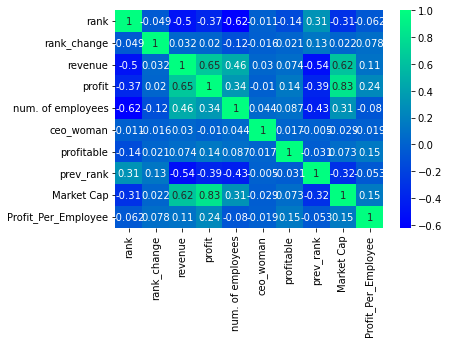

In [79]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap='winter')

In [80]:

relation = pd.crosstab(fortune_list_copy['profit'], fortune_list_copy['rank_change'], margins=True)
relation

rank_change,-178.0,-117.0,-115.0,-110.0,-101.0,-97.0,-92.0,-88.0,-87.0,-86.0,...,127.0,138.0,148.0,174.0,178.0,180.0,193.0,200.0,295.0,All
profit,,,,,,,,,,,,,,,,,,,,,
-6520.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4539.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4439.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-4202.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-2343.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61271.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76033.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89795.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
import pandas as pd
import numpy as np



e = np.zeros((relation.shape[0] - 1, relation.shape[1] - 1))
summ = relation.loc['All', 'All']

for i in range(relation.shape[0] - 1):
    for j in range(relation.shape[1] - 1):
        e[i, j] = (relation.iloc[i, -1] * relation.iloc[-1, j]) / summ


real = pd.crosstab(fortune_list_copy['profit'], fortune_list_copy['rank_change']).to_numpy()

# Calculate chi-square statistic
chi_square = np.sum((real - e) ** 2 / e)
print(chi_square)

143395.16223155928


In [82]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree,DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image
import dtreeviz.trees
import dtreeviz.trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

C:\Users\merve\AppData\Local\Temp\ipykernel_11168\1986074574.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Market Cap'] = df['Market Cap'].replace('-', np.NaN).astype(np.float)


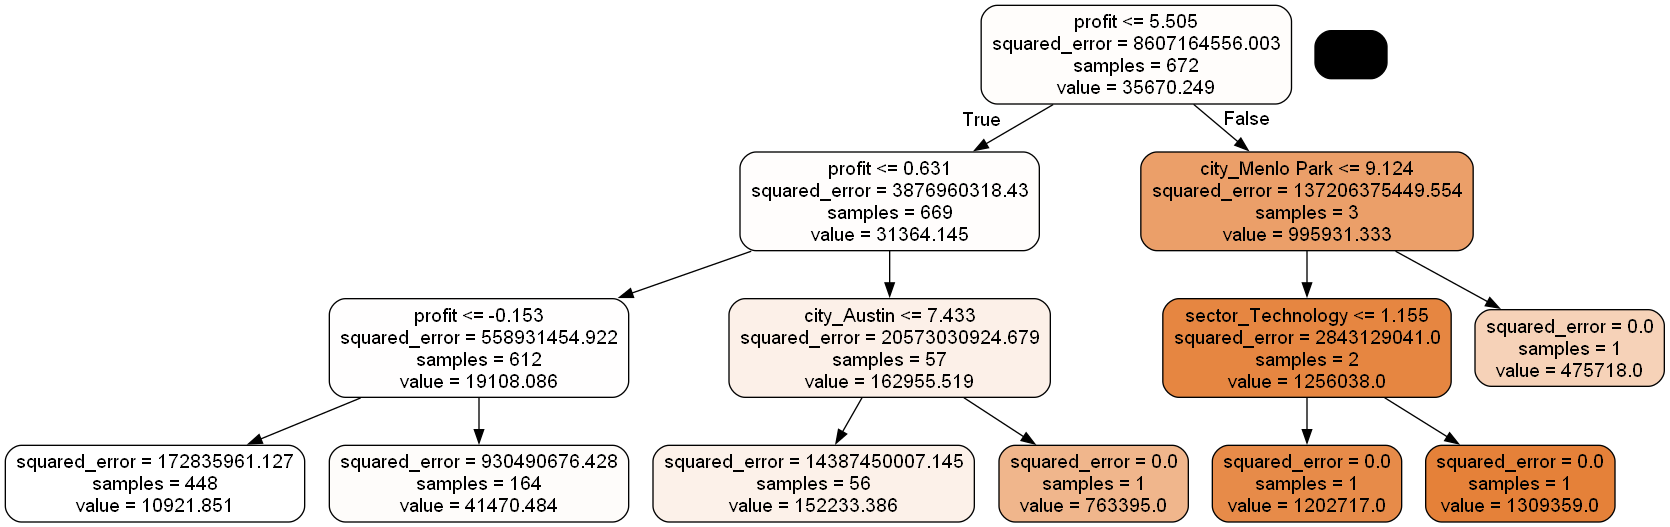

In [86]:

    df = fortune_list.copy()
    
    df = df.drop(['rank', 'rank_change', 'company', 'newcomer', 'prev_rank', 'CEO', 'Website', 'Ticker'], axis=1)
    
 
    df['Market Cap'] = df['Market Cap'].replace('-', np.NaN).astype(np.float)
 
    missing_target_rows = df[df['Market Cap'].isna()].index
    df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

    df['profit'] = df['profit'].fillna(df['profit'].mean())
    
    for column in ['ceo_founder', 'ceo_woman', 'profitable']:
        df[column] = df[column].replace({'no': 0, 'yes': 1})
    
    for column in ['sector', 'city', 'state']:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    y = df['Market Cap']
    X = df.drop('Market Cap', axis=1)
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
  
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    X_train, X_test, y_train, y_test
    dot_data = StringIO()  
    lab = preprocessing.LabelEncoder()
    y_transformed = lab.fit_transform(y)
    dt = DecisionTreeRegressor(max_depth=3, random_state=43)
    dt.fit(X_train, y_train)


   
    y_train_transformed = lab.fit_transform(y_train)

    dot_data = StringIO()  
    export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['newcomer', "Not newcomer"])
  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    Image(graph.create_png())

# Feature engineering

In [177]:
#fortune_list_copy['Profit_Per_Employee'] = fortune_list_copy['profit'] / fortune_list_copy['num. of employees']

In [89]:
s=fortune_list_copy[fortune_list_copy['profit']<2148]
print("Count of profit  ", s["profit"].value_counts())

Count of profit    572.0     4
 1995.0    3
 740.1     2
 903.0     2
 396.9     2
          ..
 1353.0    1
-397.0     1
 663.0     1
 1467.0    1
-70.0      1
Name: profit, Length: 779, dtype: int64


In [90]:
s=fortune_list_copy[fortune_list_copy['rank_change']<5]
print("Count of rank change ", s["rank_change"].value_counts())

Count of rank change   0.0     544
-2.0      15
-7.0      14
 1.0      13
-6.0      12
        ... 
-33.0      1
-71.0      1
-34.0      1
-69.0      1
-97.0      1
Name: rank_change, Length: 79, dtype: int64


In [91]:
fortune_list_copy.drop(['rank', 'rank_change', 'company', 'prev_rank', 'CEO', 'Website', 'Ticker'], axis=1)

,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap,Profit_Per_Employee,Marketshare_marketcap,Marketshare_revenue
0,572754.0,13673.0,62500.0,Retailing,Bentonville,AR,no,no,0,1,352037.0,0.218768,0.879588,3.184302
1,469822.0,33364.0,62500.0,Retailing,Seattle,WA,no,no,0,1,1202717.0,0.533824,3.005069,2.612038
2,365817.0,94680.0,62500.0,Technology,Cupertino,CA,no,no,0,1,2443962.0,1.514880,6.106403,2.033808
3,292111.0,7910.0,62500.0,Health Care,Woonsocket,RI,no,no,1,1,125204.0,0.126560,0.312831,1.624030
4,287597.0,17285.0,62500.0,Health Care,Minnetonka,MN,no,no,0,1,500468.0,0.276560,1.250453,1.598934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2124.0,-39.4,800.0,Industrials,Irvine,CA,no,yes,0,0,1705.1,-0.049250,0.004260,0.011809
996,2122.2,118.7,4800.0,Retailing,Jericho,NY,no,no,0,1,830.0,0.024729,0.002074,0.011799
997,2112.8,295.6,1534.0,Financials,New York,NY,no,no,0,1,1078.0,0.192699,0.002693,0.011746
998,2111.0,220.0,4100.0,Chemicals,Wilmington,DE,no,no,0,1,5601.9,0.053659,0.013997,0.011736


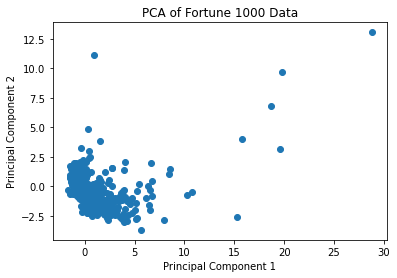

In [94]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#  PCA on numerical columns
fortune_df=fortune_list_copy
# numerical columns
numerical_columns = fortune_df.select_dtypes(include=['float64', 'int64']).columns
X = fortune_df[numerical_columns]

#  the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)


#I chose this one because it has low variance but gives us the high ratio.
n_components = 5 
pca = PCA(n_components=n_components)

# Fit the PCA model and transform the data
X_pca = pca.fit_transform(X_std)

columns = [f'PC{i+1}' for i in range(n_components)]
X_pca_df = pd.DataFrame(data=X_pca, columns=columns)


result_df = pd.concat([fortune_df[['revenue', 'city']], X_pca_df], axis=1)

plt.scatter(result_df['PC1'], result_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fortune 1000 Data')
plt.show()

Explained Variance Ratio for Each Component:
[0.48331404 0.14211088 0.10386778 0.0915158  0.07493354]


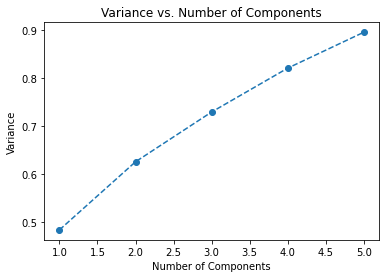

In [95]:
import numpy as np
pca.fit(X_std)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for Each Component:")
print(explained_variance)

cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Variance vs. Number of Components')
plt.show()

In [96]:
fortune_list_copy["profitable"].value_counts()

1    886
0    114
Name: profitable, dtype: int64

In [97]:
ent = pd.crosstab(fortune_list_copy['sector'], fortune_list_copy['profitable'], margins=True)
ent   #sektorlere gore kar 

profitable,0,1,All
sector,,,
Aerospace & Defense,2,15,17
Apparel,1,15,16
Business Services,8,44,52
Chemicals,0,29,29
Energy,22,78,100
Engineering & Construction,1,31,32
Financials,9,157,166
Food & Drug Stores,1,8,9
"Food, Beverages & Tobacco",1,33,34


# Using your base evaluation technique as the quality criterion, try to find the best parameters for each of your methods.


In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = df[['Market Cap', 'revenue', 'profit']]
y=df['ceo_woman']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  hyperparameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_model = DecisionTreeClassifier()

#  cross validation
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

#
best_params_dt = grid_search_dt.best_params_
print(best_params_dt)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X = df[['Market Cap', 'revenue', 'profit']]
y=df['ceo_woman']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y = y.values.ravel()
#  hyperparameter grid for logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}


lr_model = LogisticRegression()


grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)


best_params_lr = grid_search_lr.best_params_
print(best_params_lr)

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

In [105]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

X = df[['Market Cap', 'revenue', 'ceo_woman']]

#  hyperparameter grid for Agglomerative Clustering
param_grid_agg = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['ward', 'complete', 'average', 'single']
}

agg_model = AgglomerativeClustering()

# Silhouette skoru için scorer'ı oluşturdum
silhouette_scorer_agg = make_scorer(silhouette_score)

grid_search_agg = GridSearchCV(agg_model, param_grid_agg, cv=5, scoring=silhouette_scorer_agg)
grid_search_agg.fit(X)

# En iyi parametreleri yazdırdım
best_params_agg = grid_search_agg.best_params_
print(best_params_agg)

# Modelin en iyi parametrelerle tekrar calıstırfım
best_agg_model = AgglomerativeClustering(**best_params_agg)
cluster_labels = best_agg_model.fit_predict(X)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_vali

{'linkage': 'ward', 'n_clusters': 2}


# Compare selected algorithms based on the selected evaluation technique,numerically and visually.

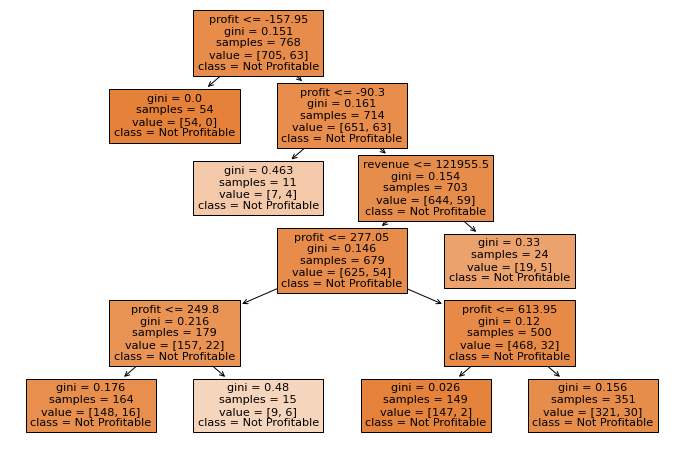

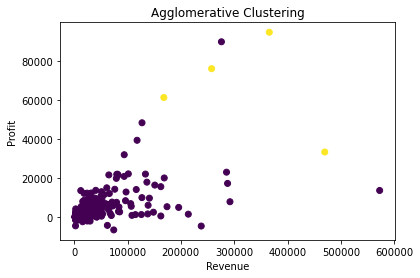

Decision Tree Accuracy: 0.9326424870466321
Logistic Regression Accuracy: 0.9326424870466321
Agglomerative Accuracy : 0.9646094918961574


In [117]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.model_selection import train_test_split

#    (['rank', 'rank_change', 'company', 'newcomer', 'prev_rank', 'CEO', 'Website', 'Ticker'], axis=1)

X = df[['Market Cap', 'revenue', 'profit']]
y=df['ceo_woman']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=10)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)


plt.figure(figsize=(12, 8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Profitable', 'Profitable'])
plt.show()

#  Logistic Regression

lr_model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

from sklearn.cluster import AgglomerativeClustering


agg_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg_model.fit_predict(X)
agg_silhouette_score = silhouette_score(X, agg_labels)

# Visualize Agglomerative Clustering
plt.scatter(X['Market Cap'], X['profit'], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.show()


# Display numerical results
print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Agglomerative Accuracy :", agg_silhouette_score)


In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

X = df[['Market Cap', 'revenue', 'profit']]
y=df['ceo_woman'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=20, min_samples_leaf=10)

dt_model.fit(X_train, y_train)

dt_train_predictions = dt_model.predict(X_train)
dt_test_predictions = dt_model.predict(X_test)

dt_train_accuracy = accuracy_score(y_train, dt_train_predictions)
dt_test_accuracy = accuracy_score(y_test, dt_test_predictions)

cv_scores = cross_val_score(dt_model, X, y, cv=10)
mean_cv_score = np.mean(cv_scores)


print(f"Training Accuracy: {dt_train_accuracy:.3f}")
print(f"Testing Accuracy: {dt_test_accuracy:.3f}")
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)

#train setinin dogrulugunun daha yuksek cıkması overfitting ihtimalinin düşük olduğunu gösteriyor

Training Accuracy: 0.918
Testing Accuracy: 0.933
Cross-validation Scores: [0.91752577 0.92708333 0.92708333 0.92708333 0.92708333 0.91666667
 0.91666667 0.91666667 0.91666667 0.91666667]
Mean CV Score: 0.9209192439862542


In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


dtree = DecisionTreeClassifier()


param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 30],
    'max_features': ['sqrt', 'log2', None]
}


grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)


best_dtree = grid_search.best_estimator_

predictions = best_dtree.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy after tuning:", accuracy)

Accuracy after tuning: 0.9326424870466321


# Agglomarative 

In [168]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

agg_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels_train = agg_model.fit_predict(X_train)
agg_labels_test = agg_model.fit_predict(X_test)
silhouette_avg = silhouette_score(X_train, agg_labels_train)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.9620660706596229


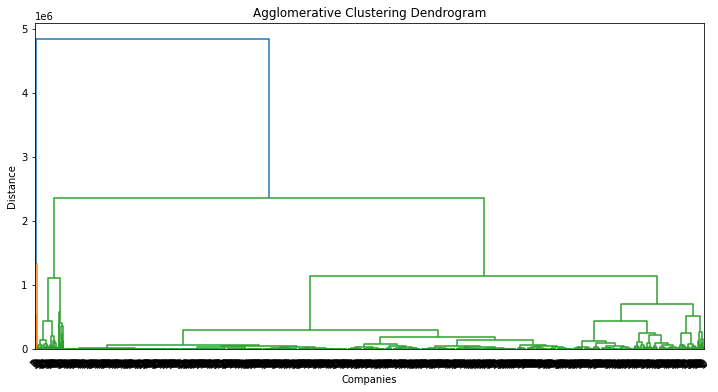

In [178]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


X_combined = np.vstack([X_train, X_test])
labels_combined = np.hstack([agg_labels_train, agg_labels_test])

# Calculate linkage matrix
linkage_matrix = linkage(X_combined, method='ward')

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=labels_combined, leaf_rotation=45, leaf_font_size=12)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Companies')
plt.ylabel('Distance')
plt.show()


# Implement your selected algorithm.(Logistic Regression)

In [123]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
classifier = LogisticRegression(solver='sag',random_state=0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge


LogisticRegression(random_state=0, solver='sag')

In [124]:
predictionLogisticR= classifier.predict( X_test)
accuracyLogisticRegresssion = accuracy_score(y_test, predictionLogisticR)
accuracyLogisticRegresssion 

0.9182389937106918

In [125]:
classifier = LogisticRegression(solver='newton-cg',random_state=3)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.


LogisticRegression(random_state=3, solver='newton-cg')

In [126]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=3)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
classifier = LogisticRegression(solver='lbfgs', random_state=3)
classifier.fit(X_resampled, y_resampled)
pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")
#classifier = LogisticRegression(solver='lbfgs',random_state=3)
#classifier.fit(X_train, y_train)


Testing Accuracy: 61.01%


In [128]:
predictionsLR = classifier.predict(X_test)
accuracyLR = accuracy_score(y_test, predictionsLR)
accuracyLR
classifier.score(X_test, y_test)


0.610062893081761

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictionsLR))

              precision    recall  f1-score   support

           0       0.94      0.61      0.74       292
           1       0.12      0.58      0.19        26

    accuracy                           0.61       318
   macro avg       0.53      0.59      0.47       318
weighted avg       0.87      0.61      0.70       318



# Implement your selected algorithms(Decision Tree)

In [133]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

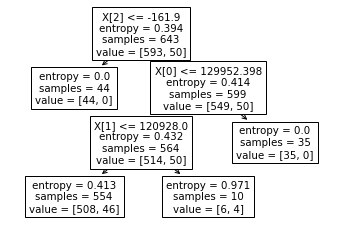

In [134]:
from sklearn import tree
tree.plot_tree(model);

In [135]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=3)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
findaccuracy = accuracy_score(y_test, predictions)
findaccuracy

0.9182389937106918

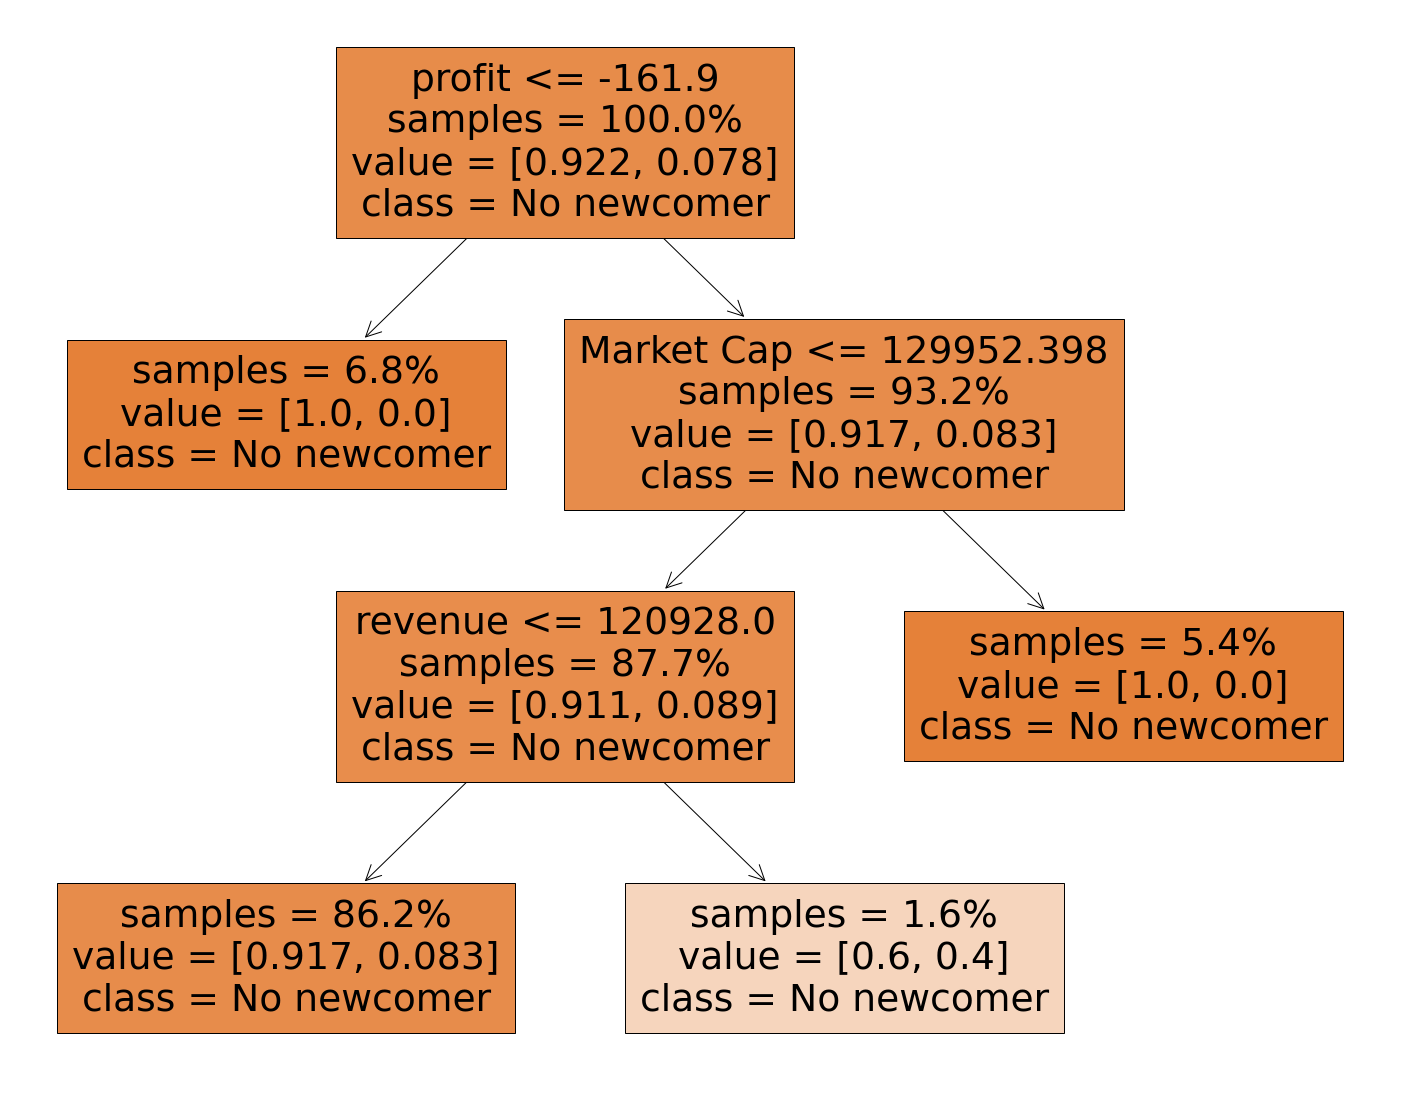

In [136]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_train.columns,
            class_names=['No newcomer', 'newcomer'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test_img.png')

# Compare the algorithms with tuned hyperparameter based on the selected evaluation technique, numerically and visually. 

In [137]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=3)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc


0.9025157232704403

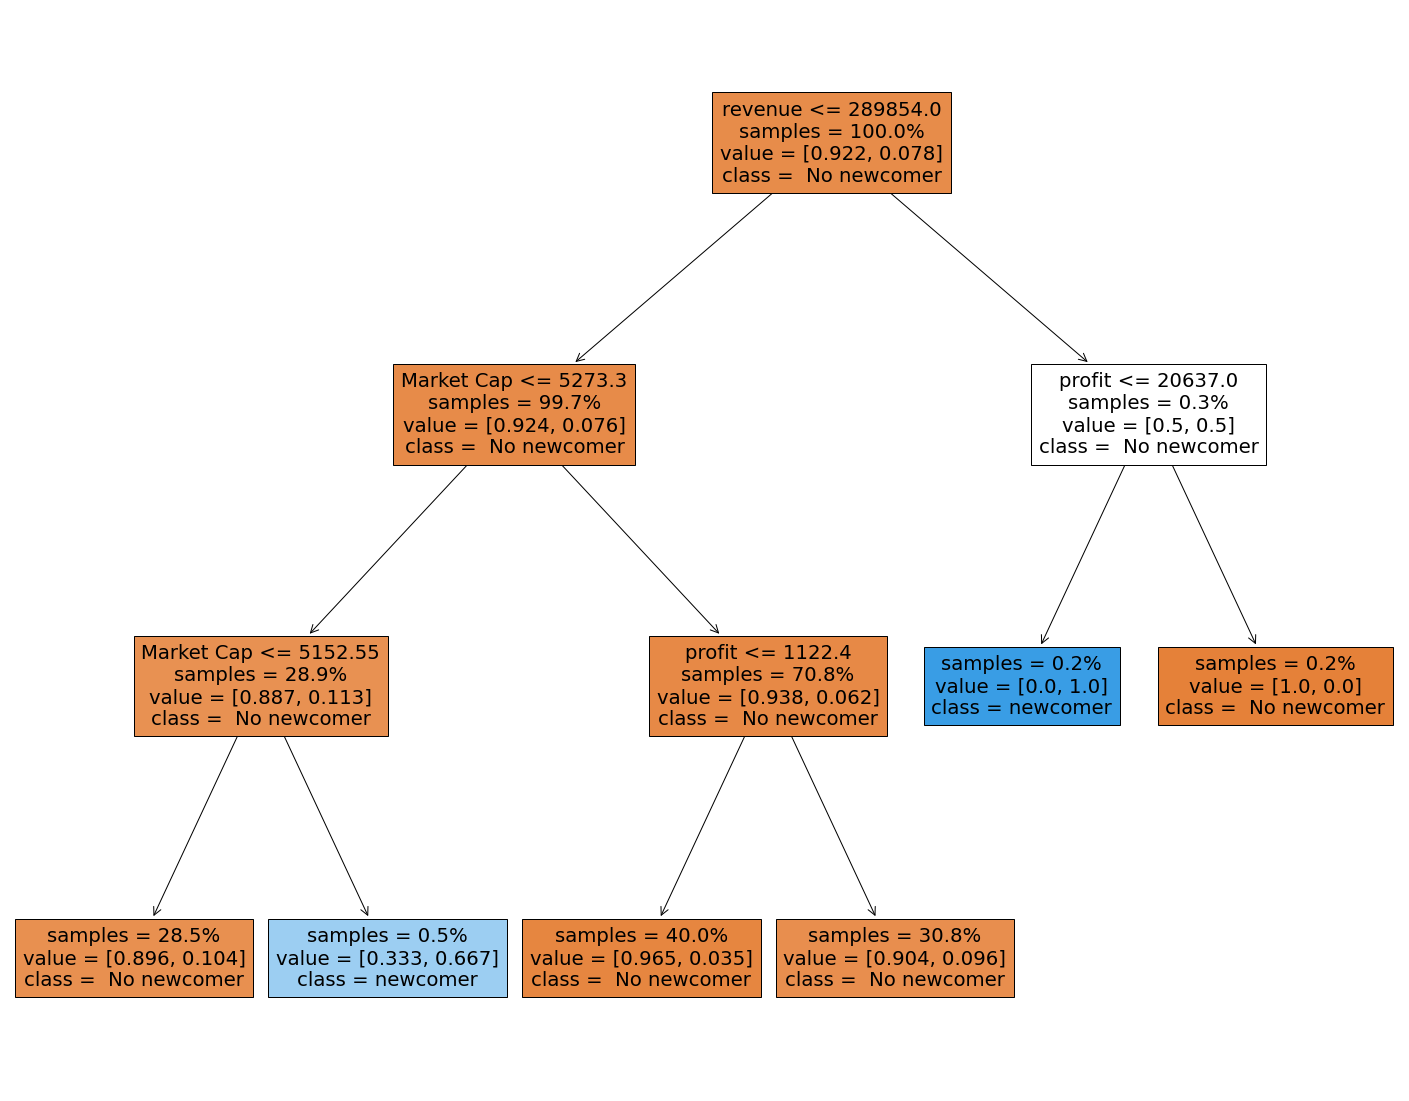

In [138]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_train.columns,
            class_names=[' No newcomer', 'newcomer'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('testimg_2.png')

In [139]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.9025157232704403

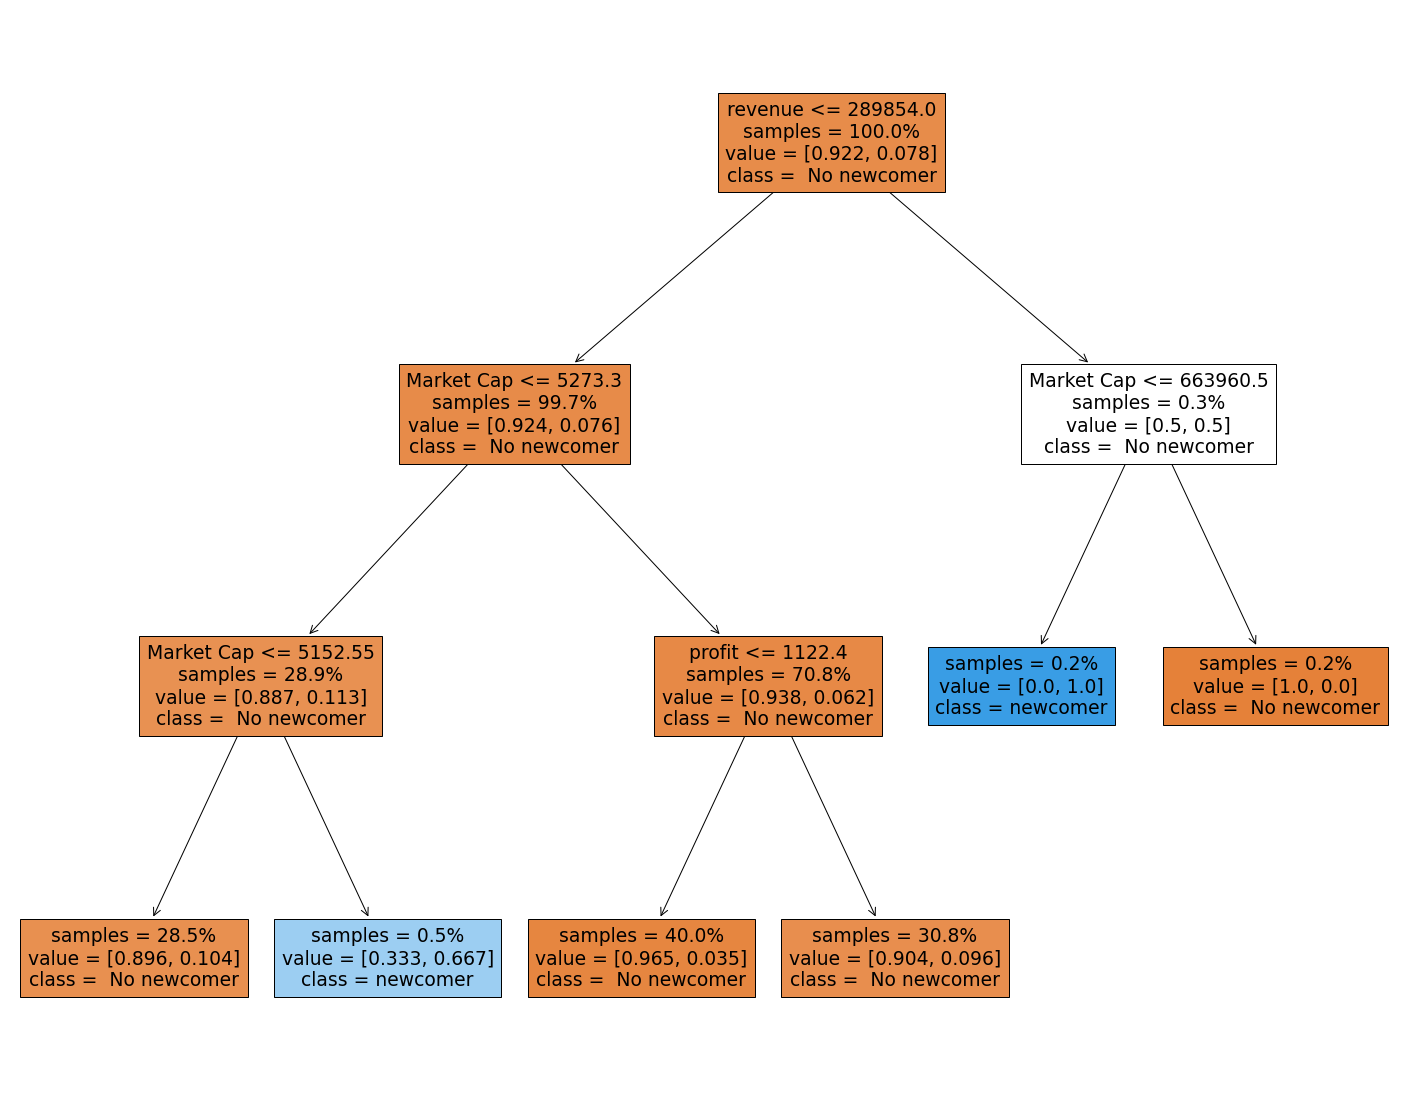

In [140]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_train.columns,
            class_names=[' No newcomer', 'newcomer'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('testimg3.png')

In [141]:
dtree = DecisionTreeClassifier(criterion="gini",min_samples_leaf=2)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.8301886792452831

In [142]:
dtree = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=2)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.8836477987421384

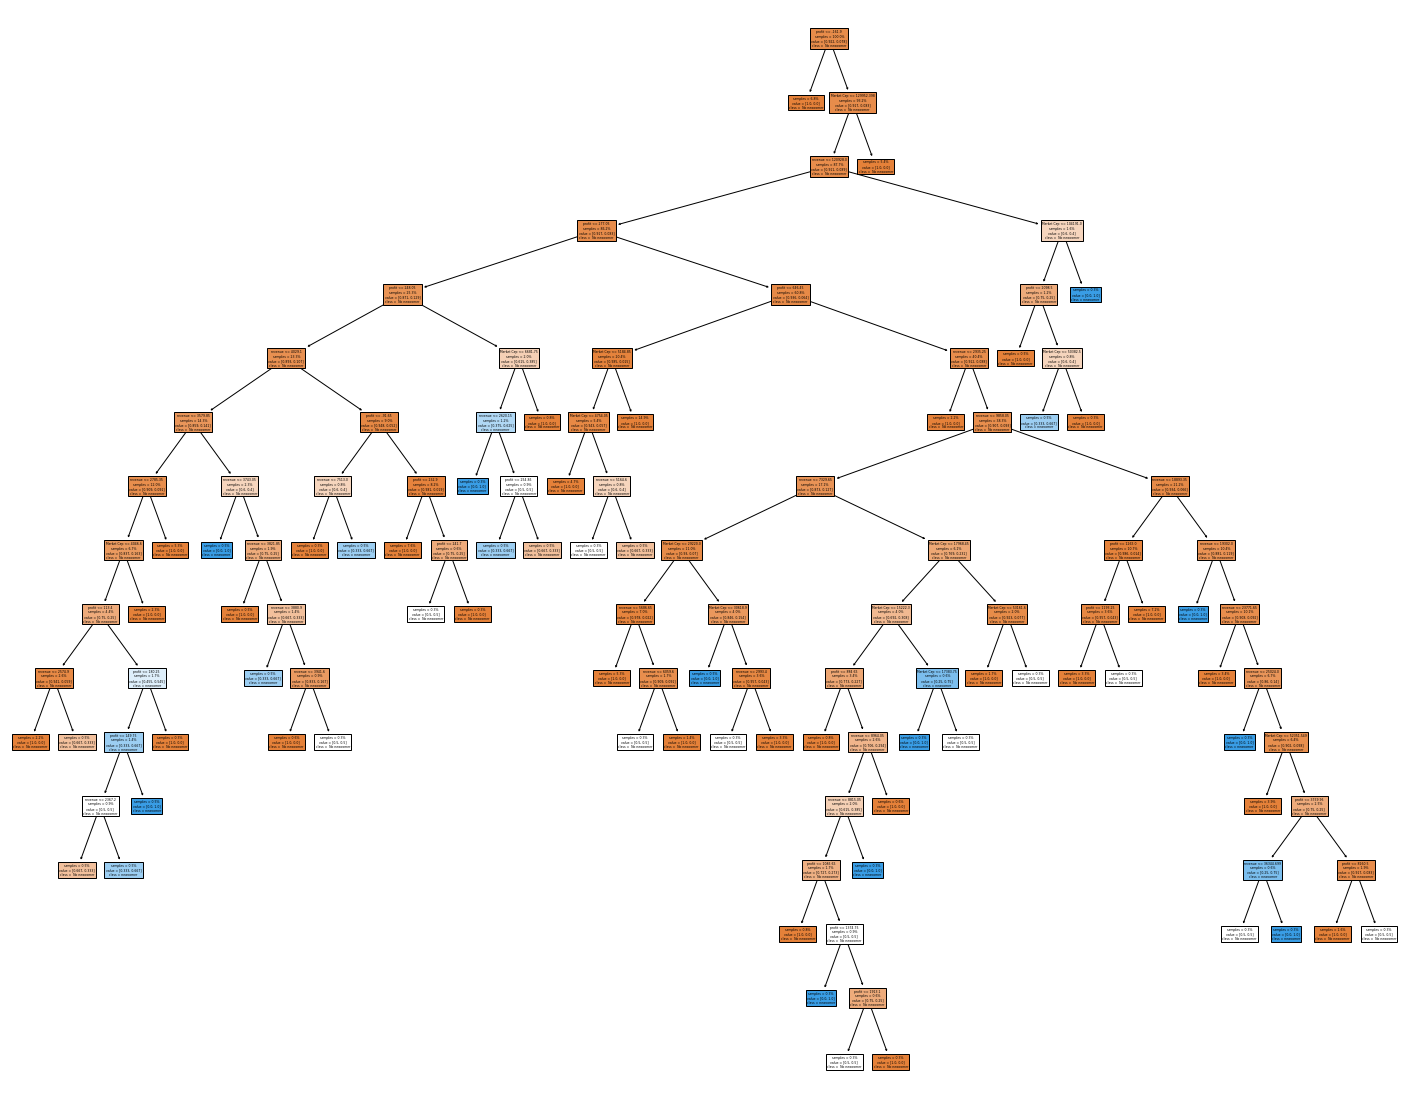

In [143]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = X_train.columns,
            class_names=[' No newcomer', 'newcomer'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test4.png')

Agglomerative Clustering - Silhouette Score (Train): 0.9620660706596229
Agglomerative Clustering - Silhouette Score (Test): 0.9561180645695603


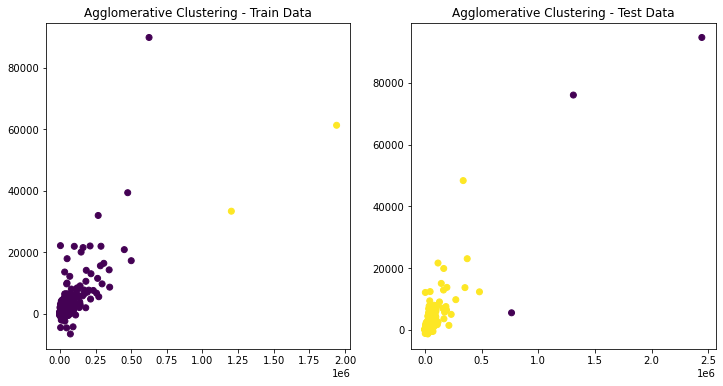

In [171]:
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt
import seaborn as sns


agg_model = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels_train = agg_model.fit_predict(X_train)
agg_labels_test = agg_model.fit_predict(X_test)


silhouette_avg_agg_train = silhouette_score(X_train, agg_labels_train)
silhouette_avg_agg_test = silhouette_score(X_test, agg_labels_test)
print(f"Agglomerative Clustering - Silhouette Score (Train): {silhouette_avg_agg_train}")
print(f"Agglomerative Clustering - Silhouette Score (Test): {silhouette_avg_agg_test}")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train['Market Cap'], X_train['profit'], c=agg_labels_train, cmap='viridis')
plt.title('Agglomerative Clustering - Train Data')

plt.subplot(1, 2, 2)
plt.scatter(X_test['Market Cap'], X_test['profit'], c=agg_labels_test, cmap='viridis')
plt.title('Agglomerative Clustering - Test Data')

plt.show()

In [144]:
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)

0.8710691823899371

In [145]:
#tuned logistic
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predicitions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       292
           1       0.00      0.00      0.00        26

    accuracy                           0.92       318
   macro avg       0.46      0.50      0.48       318
weighted avg       0.84      0.92      0.88       318



In [146]:
#tuned dtree
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       292
           1       0.15      0.12      0.13        26

    accuracy                           0.87       318
   macro avg       0.54      0.53      0.53       318
weighted avg       0.86      0.87      0.87       318



In [173]:
#agglomarative
print(classification_report(agg_labels_test, predictions))

              precision    recall  f1-score   support

           0       0.01      1.00      0.02         3
           1       1.00      0.00      0.01       315

    accuracy                           0.01       318
   macro avg       0.50      0.50      0.01       318
weighted avg       0.99      0.01      0.01       318



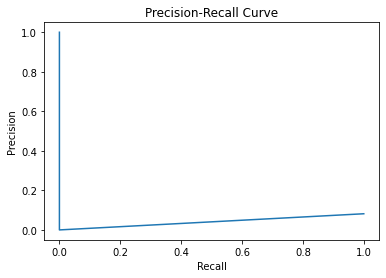

In [175]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predictions )
fig, ax = plt.subplots() 
ax.plot(recall, precision) 
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

87.42138364779875


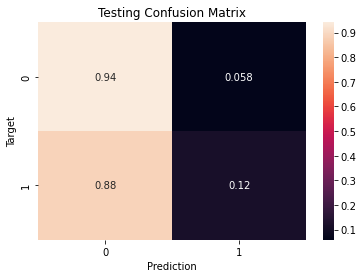

In [148]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pred= dtree.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*(100))
cf=confusion_matrix(y_test,pred,normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Testing'));

91.50943396226415


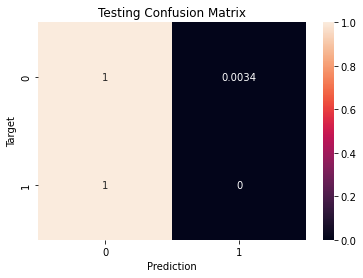

In [149]:
pred= classifier.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy*(100))
cf=confusion_matrix(y_test,pred,normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Testing'));

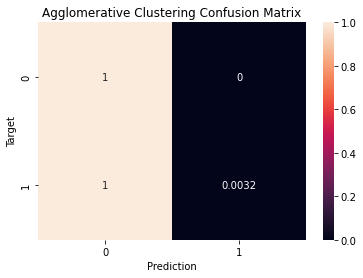

In [176]:
agg_cf = confusion_matrix(agg_labels_test, predictions, normalize='true')

# Heatmap ile confusion matrix görselleştirdim
plt.figure()
sns.heatmap(agg_cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('Agglomerative Clustering'))
plt.show()

In [152]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictionLogisticR,normalize='true')


array([[1., 0.],
       [1., 0.]])

In [153]:
metrics.confusion_matrix(y_test, predictions)

array([[292,   0],
       [ 26,   0]], dtype=int64)

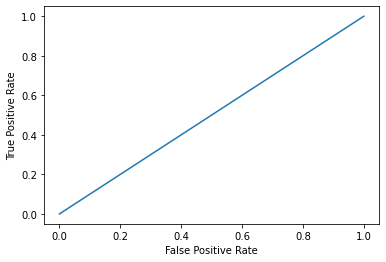

In [154]:
#ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Further Performence Can you propose any other improvement techniques

In [155]:
#Logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test, y_test)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.917272 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.915188 (0.016067) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.914113 (0.015749) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.916230 (0.016462) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.915188 (0.016067) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.914113 (0.015749) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.916230 (0.016462) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.915188 (0.016067) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.914113 (0.015749) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.916230 (0.016462) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.915188 (0.016067) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.914113 (0.015749) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.917272 (0.014717) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.915188 (0.016067) wit

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#   scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LogisticRegression())  # Logistic Regression
])

#   hyperparameter gs
param_grid = {
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'classifier__penalty': ['l2'],
    'classifier__C': [100, 10, 1.0, 0.1, 0.01]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on the test set:", accuracy)
print("Best hyperparameters:", grid_search.best_params_)

Accuracy on the test set: 0.9150943396226415
Best hyperparameters: {'classifier__C': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}


In [156]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [1,2,3,4,5,6,7,8,9]:
        for min_samples_leaf in [4,5, 10, 20, 30,40,50,60,70]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                print(best_params)
                best_acc = acc
best_acc

criterion: gini, max_depth: 1, min_samples_leaf: 4
criterion: entropy, max_depth: 4, min_samples_leaf: 4


0.9213836477987422